# 📊 Exploración de Datos - Competición Sábado

## Proyecto Independiente: Análisis de Retornos de 60 Activos

Este notebook explora el dataset de retornos diarios para la competición del sábado.

**Dataset:** 1,758 observaciones × 60 activos  
**Período:** ~7 años de retornos diarios  
**Objetivo:** Análisis exploratorio completo con visualizaciones

In [1]:
# Importaciones
import sys
sys.path.insert(0, '../codigo')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from extractor_datos import ExtractorDatos
import warnings

warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## Paso 1: Cargare y Exploración Inicial

In [2]:
# Crear extractor y cargar datos
ruta_datos = "../../data/prod_long_sharpe_u60_20260125_v1_train_dataset.csv"

extractor = ExtractorDatos(ruta_datos)
datos = extractor.cargar_datos()

# Información básica
print(f"\n✓ Datos cargados exitosamente")
print(f"  Shape: {datos.shape}")
print(f"  Columnas: {datos.columns.tolist()[:10]}... (mostrando primeras 10)")
print(f"\nPrimeras 5 filas:")
print(datos.head())

Extractor inicializado
Ruta de datos: ..\..\data\prod_long_sharpe_u60_20260125_v1_train_dataset.csv

PASO 1: CARGAR DATOS

Cargando datos desde: prod_long_sharpe_u60_20260125_v1_train_dataset.csv
✓ Detectado formato Excel
[OK] Datos cargados correctamente
  Dimensiones: 1758 filas × 60 columnas
  Memoria: 0.80 MB

✓ Datos cargados exitosamente
  Shape: (1758, 60)
  Columnas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]... (mostrando primeras 10)

Primeras 5 filas:
         1         2         3         4         5         6         7   \
0 -0.028988  0.000000  0.011857 -0.052465 -0.044951 -0.001556 -0.061189   
1 -0.001839 -0.009662  0.036648  0.002373  0.028330  0.060441  0.010914   
2  0.034392  0.013261  0.005665  0.030049  0.090729  0.010211  0.082024   
3  0.010620  0.022500  0.013097  0.072178 -0.003407  0.028614 -0.026600   
4 -0.007067  0.024293 -0.003725 -0.017852 -0.040040 -0.014205 -0.035274   

         8         9         10  ...        51        52        53        54  \
0 -0.022658 -

In [3]:
# Validar datos
extractor.validar_datos()


PASO 2: VALIDAR DATOS

Valores faltantes:
  Total de NaN: 0
  [OK] No hay valores faltantes

Tipos de datos:
  Tipos únicos: [dtype('float64')]

Valores infinitos: 0

Rango de valores:
  Mínimo: -0.554316
  Máximo: 0.271702
  Media: 0.000297

[OK] Validación completada


True

## Paso 2: Estadísticas Descriptivas

In [4]:
# Calcular estadísticas descriptivas
stats = extractor.estadisticas_descriptivas()


PASO 3: ESTADÍSTICAS DESCRIPTIVAS

Estadísticas Generales:
  Número de activos (columnas): 60
  Número de observaciones: 1758
  Período: 1758 días de retornos

Retornos Diarios (Estadísticas):
  Media: 0.000297
  Mediana: 0.000000
  Desv. Est. promedio: 0.019725
  Mínimo: -0.554316
  Máximo: 0.271702

Retornos Acumulados por Activo:
  Media: 1.1499 (114.99%)
  Mínimo: -0.6637 (-66.37%)
  Máximo: 7.2901 (729.01%)

Volatilidad Anualizada:
  Media: 0.3131 (31.31%)
  Mínimo: 0.1747 (17.47%)
  Máximo: 0.6755 (67.55%)

Sharpe Ratio (asumiendo Rf=0%):
  Media: 0.2934
  Mínimo: -0.3958
  Máximo: 1.4116

Correlación entre Activos:
  Correlación promedio: 0.2266
  Correlación mínima: -0.0840
  Correlación máxima: 0.7755

Asimetría (Skewness):
  Media: -0.4700
  Mínimo: -5.5373
  Máximo: 0.4116

Curtosis (Kurtosis):
  Media: 11.4582
  Mínimo: 0.9392
  Máximo: 116.8560

[OK] Estadísticas calculadas


In [5]:
# Tabla resumen de estadísticas
print("\n" + "="*80)
print("TABLA RESUMEN - ESTADÍSTICAS CLAVE")
print("="*80)

resumen_df = pd.DataFrame({
    'Métrica': [
        'Retorno Diario Promedio',
        'Volatilidad Diaria Promedio',
        'Volatilidad Anualizada Promedio',
        'Retorno Acumulado Promedio',
        'Sharpe Ratio Promedio',
        'Correlación Promedio',
        'Asimetría Promedio',
        'Curtosis Promedio'
    ],
    'Valor': [
        f"{stats['retorno_medio']:.6f}",
        f"{stats['volatilidad_media']:.6f}",
        f"{stats['vol_anualizada_media']:.4f} ({stats['vol_anualizada_media']*100:.2f}%)",
        f"{stats['retorno_acumulado_medio']:.4f} ({stats['retorno_acumulado_medio']*100:.2f}%)",
        f"{stats['sharpe_ratio_medio']:.4f}",
        f"{stats['correlacion_media']:.4f}",
        f"{stats['skewness_media']:.4f}",
        f"{stats['kurtosis_media']:.4f}"
    ]
})

print(resumen_df.to_string(index=False))
print("="*80)


TABLA RESUMEN - ESTADÍSTICAS CLAVE
                        Métrica            Valor
        Retorno Diario Promedio         0.000297
    Volatilidad Diaria Promedio         0.019725
Volatilidad Anualizada Promedio  0.3131 (31.31%)
     Retorno Acumulado Promedio 1.1499 (114.99%)
          Sharpe Ratio Promedio           0.2934
           Correlación Promedio           0.2266
             Asimetría Promedio          -0.4700
              Curtosis Promedio          11.4582


## Paso 3: Análisis de Activos Extremos

In [6]:
# Análisis de activos extremos
extractor.activos_extremos(n=5)


PASO 4: ACTIVOS EXTREMOS

Top 5 Mejores Activos (por retorno acumulado):
  1. Activo 22: 7.2901 (729.01%)
  2. Activo 51: 5.7359 (573.59%)
  3. Activo 43: 4.7582 (475.82%)
  4. Activo 48: 4.7462 (474.62%)
  5. Activo 56: 4.4133 (441.33%)

Top 5 Peores Activos (por retorno acumulado):
  1. Activo 38: -0.4067 (-40.67%)
  2. Activo 42: -0.4196 (-41.96%)
  3. Activo 10: -0.4474 (-44.74%)
  4. Activo 28: -0.5101 (-51.01%)
  5. Activo 23: -0.6637 (-66.37%)

Top 5 Activos Más Volátiles:
  1. Activo 13: 0.042555
  2. Activo 9: 0.039092
  3. Activo 42: 0.033874
  4. Activo 28: 0.030434
  5. Activo 39: 0.025397

Top 5 Activos Menos Volátiles:
  1. Activo 47: 0.011005
  2. Activo 56: 0.011530
  3. Activo 41: 0.012057
  4. Activo 51: 0.012201
  5. Activo 50: 0.013682

Top 5 Activos Mejores por Sharpe Ratio:
  1. Activo 51: 1.4116
  2. Activo 56: 1.3227
  3. Activo 47: 1.1851
  4. Activo 41: 1.0964
  5. Activo 43: 0.8913

[OK] Análisis de activos extremos completado


## Paso 4: Visualizaciones - Distribución de Retornos

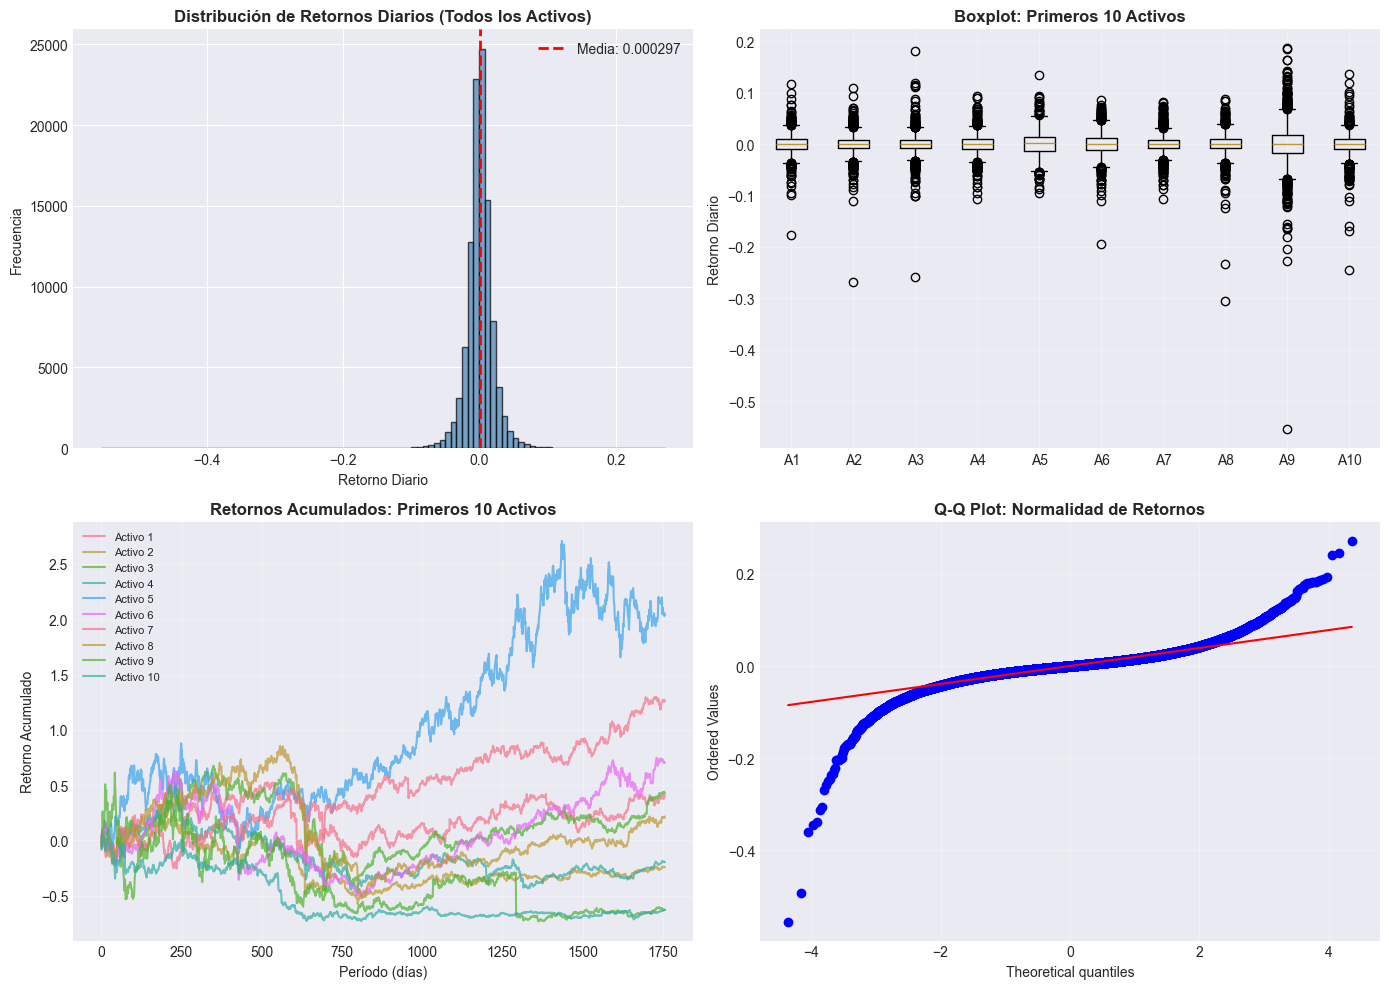

✓ Gráfico 1 guardado: 01_Distribucion_Retornos.png


In [7]:
# Gráfico 1: Distribución de retornos diarios
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma de todos los retornos
retornos_todos = datos.values.flatten()
axes[0, 0].hist(retornos_todos, bins=100, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Distribución de Retornos Diarios (Todos los Activos)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Retorno Diario')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(retornos_todos.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {retornos_todos.mean():.6f}')
axes[0, 0].legend()

# Distribución de retornos de actividades seleccionadas
for i, col in enumerate(datos.columns[:4]):
    row = i // 2
    col_idx = i % 2
    if i < 3:
        ax = axes[i // 2, 1] if i == 0 else axes[1, 1] if i == 1 else axes[0, 1]
        if i == 0:
            ax = axes[0, 1]
        elif i == 1:
            ax = axes[0, 1]
        else:
            ax = axes[1, 1]
        
# Gráfico de cajas (boxplot)
axes[0, 1].boxplot([datos[col].values for col in datos.columns[:10]], labels=[f'A{i+1}' for i in range(10)])
axes[0, 1].set_title('Boxplot: Primeros 10 Activos', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Retorno Diario')
axes[0, 1].grid(True, alpha=0.3)

# Retornos acumulados de selección de activos
retornos_acumulados = np.exp(np.log(1 + datos).cumsum()) - 1
for col in datos.columns[:10]:
    axes[1, 0].plot(retornos_acumulados[col], alpha=0.7, label=f'Activo {col}', linewidth=1.5)
axes[1, 0].set_title('Retornos Acumulados: Primeros 10 Activos', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Período (días)')
axes[1, 0].set_ylabel('Retorno Acumulado')
axes[1, 0].legend(loc='best', fontsize=8)
axes[1, 0].grid(True, alpha=0.3)

# Q-Q plot para verificar normalidad
from scipy import stats as sp_stats
sp_stats.probplot(retornos_todos, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Normalidad de Retornos', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../notebooks/01_Distribucion_Retornos.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico 1 guardado: 01_Distribucion_Retornos.png")

## Paso 5: Matriz de Correlaciones

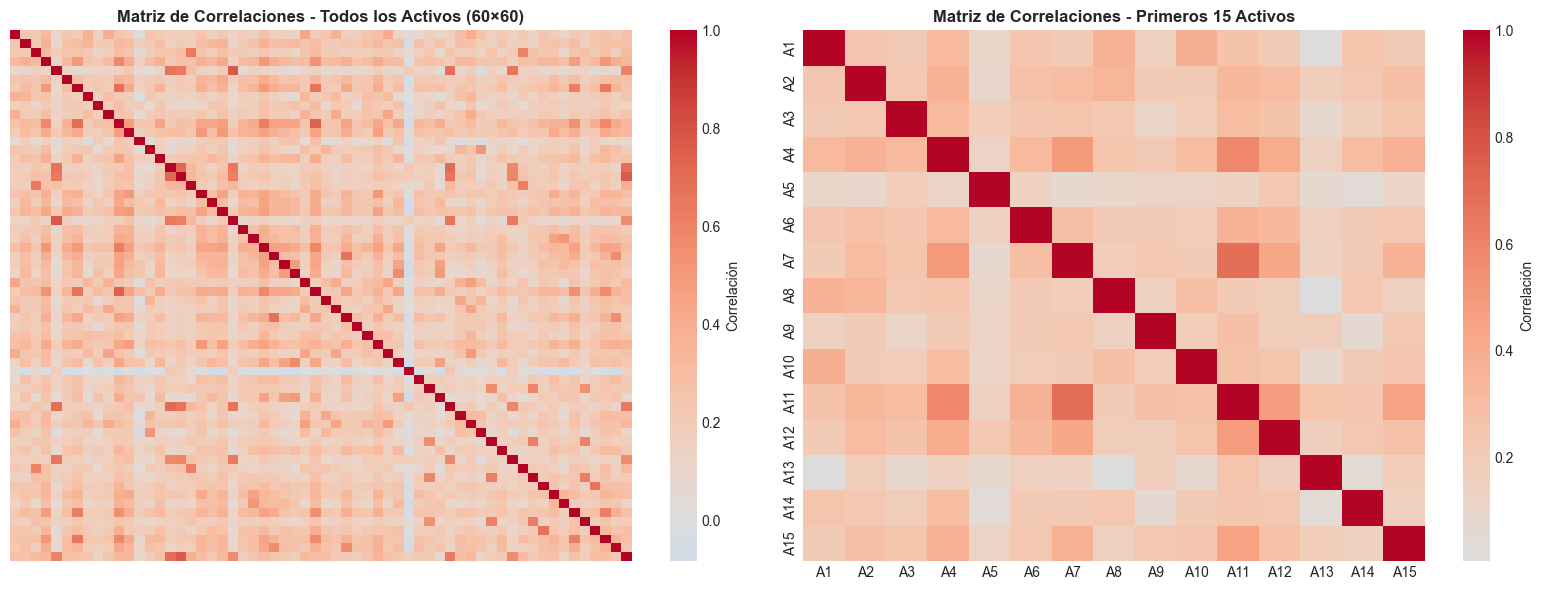


Estadísticas de Correlación:
  Media: 0.2266
  Mediana: 0.2154
  Mínimo: -0.0840
  Máximo: 0.7755
  Desv. Est.: 0.1184
✓ Gráfico 2 guardado: 02_Matriz_Correlaciones.png


In [8]:
# Gráfico 2: Matriz de Correlaciones
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calcular matriz de correlación
corr_matrix = datos.corr()

# Heatmap completo
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, ax=axes[0], 
            xticklabels=False, yticklabels=False, cbar_kws={'label': 'Correlación'})
axes[0].set_title('Matriz de Correlaciones - Todos los Activos (60×60)', fontsize=12, fontweight='bold')

# Heatmap de subconjunto (primeros 15 activos)
sns.heatmap(corr_matrix.iloc[:15, :15], cmap='coolwarm', center=0, ax=axes[1],
            xticklabels=[f'A{i+1}' for i in range(15)],
            yticklabels=[f'A{i+1}' for i in range(15)],
            cbar_kws={'label': 'Correlación'}, annot=False)
axes[1].set_title('Matriz de Correlaciones - Primeros 15 Activos', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../notebooks/02_Matriz_Correlaciones.png', dpi=300, bbox_inches='tight')
plt.show()

# Estadísticas de correlación
corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
print(f"\nEstadísticas de Correlación:")
print(f"  Media: {corr_values.mean():.4f}")
print(f"  Mediana: {np.median(corr_values):.4f}")
print(f"  Mínimo: {corr_values.min():.4f}")
print(f"  Máximo: {corr_values.max():.4f}")
print(f"  Desv. Est.: {corr_values.std():.4f}")

print("✓ Gráfico 2 guardado: 02_Matriz_Correlaciones.png")

In [9]:
# Calcular métricas por activo
retorno_acumulado = np.exp(datos.sum()) - 1
volatilidad = datos.std()
sharpe_ratio = (datos.mean() * 252) / (datos.std() * np.sqrt(252))

# Crear DataFrame con métricas
metricas_df = pd.DataFrame({
    'Activo': datos.columns,
    'Ret. Acumulado': retorno_acumulado.values,
    'Volatilidad Diaria': volatilidad.values,
    'Vol. Anualizada': (volatilidad * np.sqrt(252)).values,
    'Sharpe Ratio': sharpe_ratio.values,
    'Retorno Medio': datos.mean().values
})

metricas_df = metricas_df.sort_values('Sharpe Ratio', ascending=False)

print("\nTop 10 Activos por Sharpe Ratio:")
print(metricas_df.head(10).to_string(index=False))

print("\nBottom 10 Activos por Sharpe Ratio:")
print(metricas_df.tail(10).to_string(index=False))


Top 10 Activos por Sharpe Ratio:
 Activo  Ret. Acumulado  Volatilidad Diaria  Vol. Anualizada  Sharpe Ratio  Retorno Medio
     51        5.735863            0.012201         0.193692      1.411636       0.001085
     56        4.413339            0.011530         0.183033      1.322656       0.000961
     47        3.238856            0.011005         0.174693      1.185120       0.000822
     41        3.322947            0.012057         0.191392      1.096431       0.000833
     43        4.758186            0.017736         0.281545      0.891304       0.000996
     50        2.713679            0.013682         0.217200      0.865891       0.000746
     22        7.290089            0.023587         0.374434      0.809709       0.001203
     16        2.799484            0.016781         0.266386      0.718303       0.000759
     48        4.746210            0.024210         0.384322      0.652172       0.000995
     18        1.953561            0.015035         0.238675      

## Paso 7: Visualizaciones de Métricas

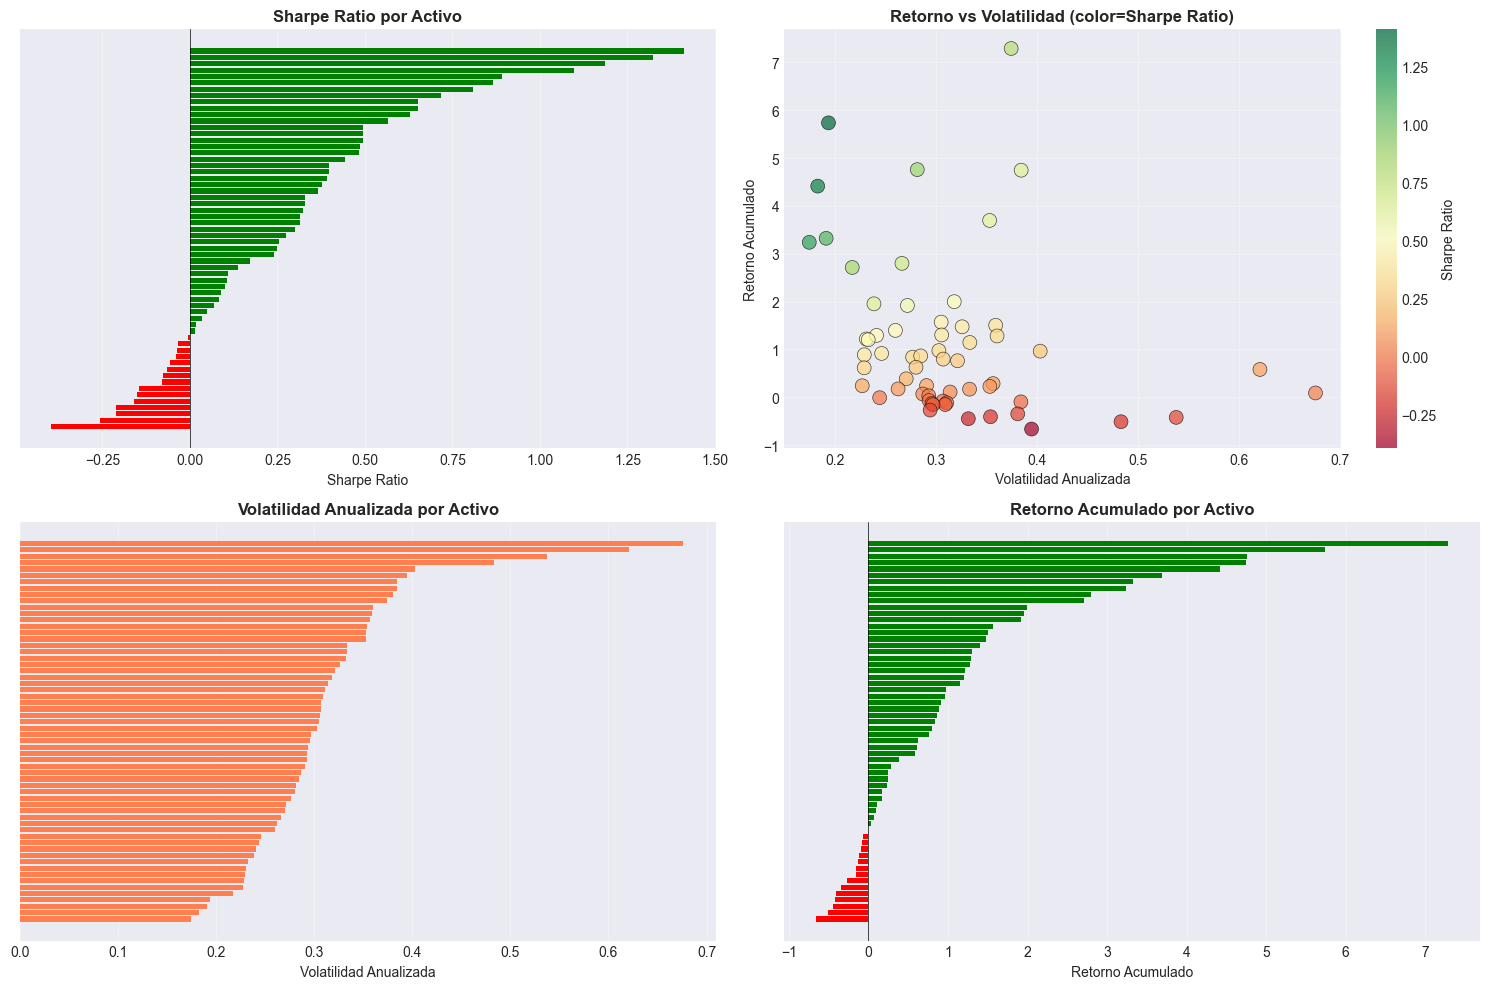

✓ Gráfico 3 guardado: 03_Metricas_Activos.png


In [10]:
# Gráfico 3: Métricas por Activo
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sharpe Ratio por activo
metricas_sorted_sharpe = metricas_df.sort_values('Sharpe Ratio', ascending=True)
colors_sharpe = ['green' if x > 0 else 'red' for x in metricas_sorted_sharpe['Sharpe Ratio']]
axes[0, 0].barh(range(len(metricas_sorted_sharpe)), metricas_sorted_sharpe['Sharpe Ratio'], color=colors_sharpe)
axes[0, 0].set_yticks([])
axes[0, 0].set_title('Sharpe Ratio por Activo', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sharpe Ratio')
axes[0, 0].axvline(0, color='black', linestyle='-', linewidth=0.5)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Retorno Acumulado vs Volatilidad (scatter)
scatter = axes[0, 1].scatter(metricas_df['Vol. Anualizada'], 
                             metricas_df['Ret. Acumulado'],
                             c=metricas_df['Sharpe Ratio'],
                             cmap='RdYlGn', s=100, alpha=0.7, edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel('Volatilidad Anualizada')
axes[0, 1].set_ylabel('Retorno Acumulado')
axes[0, 1].set_title('Retorno vs Volatilidad (color=Sharpe Ratio)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 1], label='Sharpe Ratio')

# Volatilidad por activo
metricas_sorted_vol = metricas_df.sort_values('Vol. Anualizada', ascending=True)
axes[1, 0].barh(range(len(metricas_sorted_vol)), metricas_sorted_vol['Vol. Anualizada'], color='coral')
axes[1, 0].set_yticks([])
axes[1, 0].set_title('Volatilidad Anualizada por Activo', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Volatilidad Anualizada')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Retorno Acumulado por activo
metricas_sorted_ret = metricas_df.sort_values('Ret. Acumulado', ascending=True)
colors_ret = ['green' if x > 0 else 'red' for x in metricas_sorted_ret['Ret. Acumulado']]
axes[1, 1].barh(range(len(metricas_sorted_ret)), metricas_sorted_ret['Ret. Acumulado'], color=colors_ret)
axes[1, 1].set_yticks([])
axes[1, 1].set_title('Retorno Acumulado por Activo', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Retorno Acumulado')
axes[1, 1].axvline(0, color='black', linestyle='-', linewidth=0.5)
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../notebooks/03_Metricas_Activos.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico 3 guardado: 03_Metricas_Activos.png")

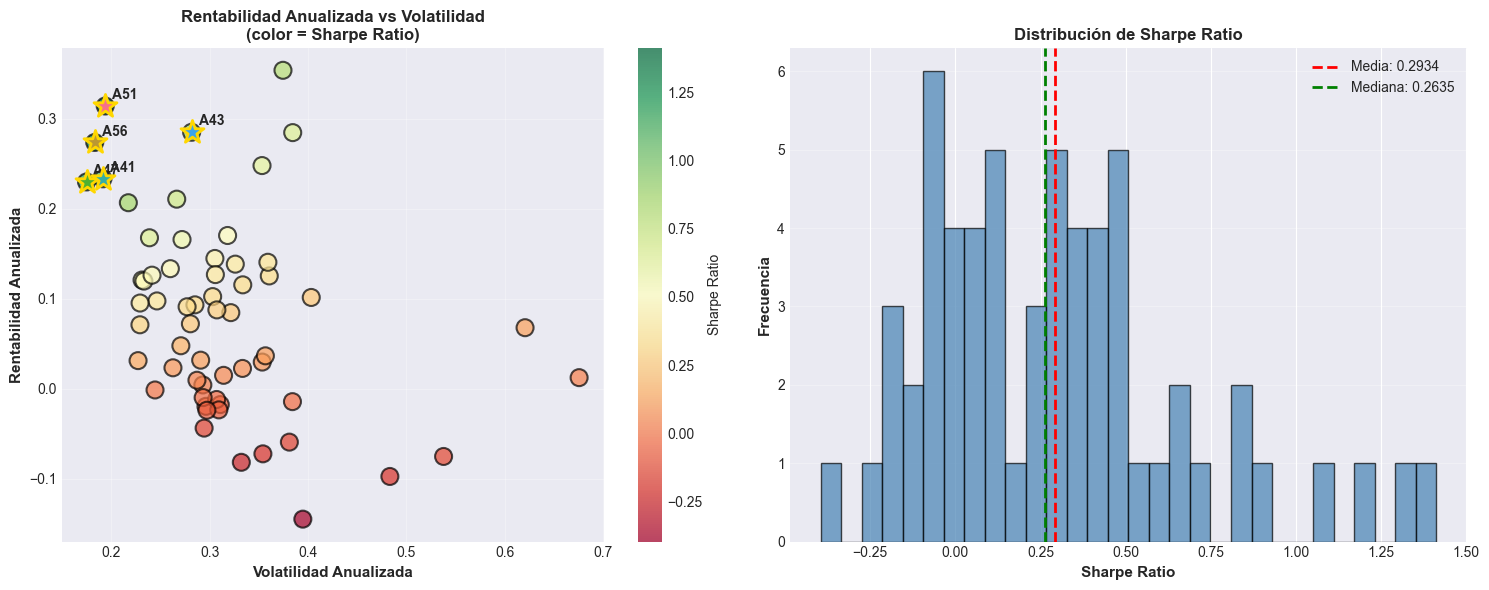

✓ Gráfico 4 guardado: 04_Rentabilidad_vs_Riesgo.png


In [11]:
# Gráfico 4: Rentabilidad vs Riesgo Detallado
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Rentabilidad anualizada vs volatilidad
retorno_anualizado = (1 + datos.mean()) ** 252 - 1
volatilidad_anualizada = datos.std() * np.sqrt(252)

scatter1 = axes[0].scatter(volatilidad_anualizada, retorno_anualizado, 
                          c=sharpe_ratio.values, cmap='RdYlGn', s=150, 
                          alpha=0.7, edgecolors='black', linewidth=1.5)
axes[0].set_xlabel('Volatilidad Anualizada', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Rentabilidad Anualizada', fontsize=11, fontweight='bold')
axes[0].set_title('Rentabilidad Anualizada vs Volatilidad\n(color = Sharpe Ratio)', 
                 fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Sharpe Ratio')

# Fronteras de eficiencia simplificadas
# Activos con mejor ratio rentabilidad/riesgo
ratio_ret_riesgo = retorno_anualizado / volatilidad_anualizada
top_5 = ratio_ret_riesgo.nlargest(5).index

for activo in top_5:
    axes[0].scatter(volatilidad_anualizada[activo], retorno_anualizado[activo], 
                   s=300, marker='*', edgecolors='gold', linewidth=2, zorder=5)
    axes[0].annotate(f'A{activo}', 
                    (volatilidad_anualizada[activo], retorno_anualizado[activo]),
                    xytext=(5, 5), textcoords='offset points', fontweight='bold')

# Distribución de Sharpe Ratio
axes[1].hist(sharpe_ratio.values, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[1].axvline(sharpe_ratio.mean(), color='red', linestyle='--', linewidth=2, 
               label=f'Media: {sharpe_ratio.mean():.4f}')
axes[1].axvline(sharpe_ratio.median(), color='green', linestyle='--', linewidth=2, 
               label=f'Mediana: {sharpe_ratio.median():.4f}')
axes[1].set_xlabel('Sharpe Ratio', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
axes[1].set_title('Distribución de Sharpe Ratio', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../notebooks/04_Rentabilidad_vs_Riesgo.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico 4 guardado: 04_Rentabilidad_vs_Riesgo.png")

In [12]:
print("="*80)
print("RESUMEN EJECUTIVO - EXPLORACIÓN DE DATOS")
print("="*80)

print(f"\n📊 CARACTERÍSTICAS DEL DATASET:")
print(f"  • Activos: {datos.shape[1]}")
print(f"  • Observaciones: {datos.shape[0]} días")
print(f"  • Período: ~{datos.shape[0]/252:.1f} años de retornos diarios")

print(f"\n📈 RENTABILIDAD:")
print(f"  • Retorno medio diario: {datos.mean().mean():.6f} ({datos.mean().mean()*100:.4f}%)")
print(f"  • Mejor activo (ret. acumulado): Activo {retorno_acumulado.idxmax()} ({retorno_acumulado.max()*100:.2f}%)")
print(f"  • Peor activo (ret. acumulado): Activo {retorno_acumulado.idxmin()} ({retorno_acumulado.min()*100:.2f}%)")

print(f"\n📉 RIESGO:")
print(f"  • Volatilidad media diaria: {datos.std().mean():.6f}")
print(f"  • Volatilidad anualizada media: {(datos.std().mean() * np.sqrt(252))*100:.2f}%")
print(f"  • Activo más volátil: Activo {datos.std().idxmax()} ({datos.std().idxmax():.6f})")
print(f"  • Activo menos volátil: Activo {datos.std().idxmin()} ({datos.std().idxmin():.6f})")

print(f"\n⚡ SHARPE RATIO:")
print(f"  • Media: {sharpe_ratio.mean():.4f}")
print(f"  • Mediana: {sharpe_ratio.median():.4f}")
print(f"  • Máximo: {sharpe_ratio.max():.4f} (Activo {sharpe_ratio.idxmax()})")
print(f"  • Mínimo: {sharpe_ratio.min():.4f} (Activo {sharpe_ratio.idxmin()})")

print(f"\n🔗 CORRELACIÓN:")
corr_triag = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
print(f"  • Correlación media: {corr_triag.mean():.4f}")
print(f"  • Correlación mediana: {np.median(corr_triag):.4f}")
print(f"  • Rango: [{corr_triag.min():.4f}, {corr_triag.max():.4f}]")

print(f"\n📊 DISTRIBUCIÓN DE RETORNOS:")
skewness = datos.skew().mean()
kurtosis = datos.kurtosis().mean()
print(f"  • Asimetría (Skewness) media: {skewness:.4f}")
if skewness < -0.5:
    print(f"    → Distribución asimétrica negativa (colas izquierdas largas)")
elif skewness > 0.5:
    print(f"    → Distribución asimétrica positiva (colas derechas largas)")
else:
    print(f"    → Distribución relativamente simétrica")

print(f"  • Curtosis media: {kurtosis:.4f}")
if kurtosis > 3:
    print(f"    → Distribuciones leptocúrticas (colas pesadas - riesgo extremo)")
else:
    print(f"    → Distribuciones moderadas")

print(f"\n💡 CONCLUSIONES CLAVE:")
print(f"  1. El dataset contiene 60 activos con retornos diarios durante ~{datos.shape[0]/252:.1f} años")
print(f"  2. La rentabilidad promedio es muy baja ({datos.mean().mean()*100*252:.2f}% anualizado)")
print(f"  3. La volatilidad media ({(datos.std().mean() * np.sqrt(252))*100:.2f}% anual) sugiere activos moderadamente volátiles")
print(f"  4. Los Sharpe Ratios promedios son bajos, indicando relación riesgo-rendimiento pobre")
print(f"  5. La correlación promedio ({corr_triag.mean():.2f}) sugiere activos moderadamente correlacionados")
print(f"  6. Las distribuciones muestran colas pesadas (riesgo de eventos extremos)")

print(f"\n🎯 RECOMENDACIONES PARA OPTIMIZACIÓN:")
print(f"  • Seleccionar activos con Sharpe Ratio > {sharpe_ratio.quantile(0.75):.4f} (top 25%)")
print(f"  • Considerar diversificación dentro de correlaciones moderadas")
print(f"  • Evaluar estrategias de cobertura ante riesgo extremo (colas pesadas)")
print(f"  • Estudiar clusters de activos según correlación")

print("\n" + "="*80)
print("✓ EXPLORACIÓN COMPLETADA")
print("="*80)

RESUMEN EJECUTIVO - EXPLORACIÓN DE DATOS

📊 CARACTERÍSTICAS DEL DATASET:
  • Activos: 60
  • Observaciones: 1758 días
  • Período: ~7.0 años de retornos diarios

📈 RENTABILIDAD:
  • Retorno medio diario: 0.000297 (0.0297%)
  • Mejor activo (ret. acumulado): Activo 22 (729.01%)
  • Peor activo (ret. acumulado): Activo 23 (-66.37%)

📉 RIESGO:
  • Volatilidad media diaria: 0.019725
  • Volatilidad anualizada media: 31.31%
  • Activo más volátil: Activo 13 (13.000000)
  • Activo menos volátil: Activo 47 (47.000000)

⚡ SHARPE RATIO:
  • Media: 0.2934
  • Mediana: 0.2635
  • Máximo: 1.4116 (Activo 51)
  • Mínimo: -0.3958 (Activo 23)

🔗 CORRELACIÓN:
  • Correlación media: 0.2266
  • Correlación mediana: 0.2154
  • Rango: [-0.0840, 0.7755]

📊 DISTRIBUCIÓN DE RETORNOS:
  • Asimetría (Skewness) media: -0.4700
    → Distribución relativamente simétrica
  • Curtosis media: 11.4582
    → Distribuciones leptocúrticas (colas pesadas - riesgo extremo)

💡 CONCLUSIONES CLAVE:
  1. El dataset contiene 60